Question: Which housing market has shown the most increase in price, Louisville or Indianapolis?

Create dataset from Zillow highest priced and lowest priced 820 home sales (max limit before Zillow blocks it).
Settings for this process are houses only, sorted by price (high to low then low to high), sold in the last 90 days (performed on 12/4/24 with Google Chrome addon)

In [1]:
#bring in tools needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import data sets for each grouping: 820 highest priced homes, 820 lowest priced homes in the last 90 days for Louisville and Indianapolis
lou_low = pd.read_csv("./Louisville_lowest_master.csv")
lou_high = pd.read_csv("./Louisville_highest_master.csv")
indy_low = pd.read_csv("./Indianapolis_lowest_master.csv")
indy_high = pd.read_csv("./Indianapolis_highest_master.csv")

Clean Datasets

In [3]:
# Created column as an indicator for data source

lou_low['set'] = 'lou_low'
lou_high['set'] = 'lou_high'
indy_low['set'] = 'indy_low'
indy_high['set'] = 'indy_high'

In [7]:
# Join datasets and remove unnecessary columns
all_data = pd.concat([lou_low, lou_high, indy_low, indy_high])
all_data = all_data.drop(columns=["Property type","Property URL","MLS ID","Country","Zip","State","Street address","City"])

#remove any rows that are missing a property price, sold date, or price per living area unit value
all_data_no_null = all_data.dropna(subset=["Property price (USD)","Price per living area unit (USD)","Sold date (MM/DD/YYYY)"])

# Converted data column to datetime datatype
all_data_no_null['date'] = pd.to_datetime(all_data_no_null["Sold date (MM/DD/YYYY)"])

# Dropped the old column
all_data_no_null = all_data_no_null.drop("Sold date (MM/DD/YYYY)", axis=1)
all_data_no_null = all_data_no_null.sort_values(by='date')

# Created a month column indicating month name
all_data_no_null['month'] = all_data_no_null['date'].dt.month_name()

/tmp/ipykernel_665/662167429.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data_no_null['date'] = pd.to_datetime(all_data_no_null["Sold date (MM/DD/YYYY)"])
/tmp/ipykernel_665/662167429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_no_null['date'] = pd.to_datetime(all_data_no_null["Sold date (MM/DD/YYYY)"])


In [8]:
# Created line_plot variable using a groupby set and month and the aggregate function, rounding to two places and 'unstacking'

line_plot = all_data_no_null[['Property price (USD)', 'set', 'month']].groupby(['set', 'month']).mean().round(2).unstack()
line_plot = line_plot.iloc[:, ::-1].transpose()

Text(0, 0.5, 'Mean Home Price')

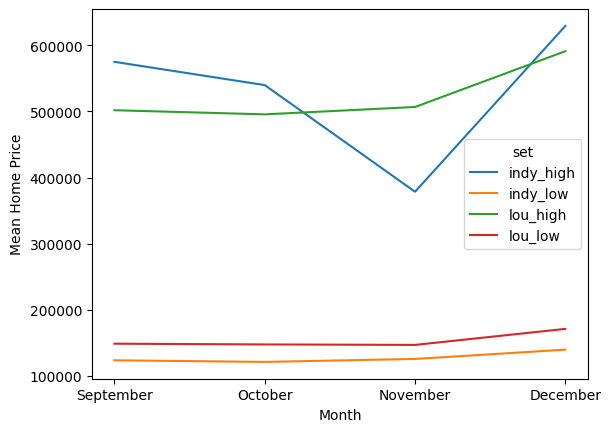

In [9]:
# Plot data

ax = line_plot.plot()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
ax.set_xlabel('Month')
ax.set_ylabel('Mean Home Price')

The fun part!

In [12]:
# sort data by mean and median for each month

lou_low_september_mean = lou_low_sorted["Property price (USD)"].iloc[0:267].mean()
lou_low_october_mean = lou_low_sorted["Property price (USD)"].iloc[267:558].mean()
lou_low_november_mean = lou_low_sorted["Property price (USD)"].iloc[558:794].mean()
lou_low_december_mean = lou_low_sorted["Property price (USD)"].iloc[794:803].mean()

indy_low_september_mean = indy_low_sorted["Property price (USD)"].iloc[0:308].mean()
indy_low_october_mean = indy_low_sorted["Property price (USD)"].iloc[308:626].mean()
indy_low_november_mean = indy_low_sorted["Property price (USD)"].iloc[626:798].mean()
indy_low_december_mean = indy_low_sorted["Property price (USD)"].iloc[798:813].mean()



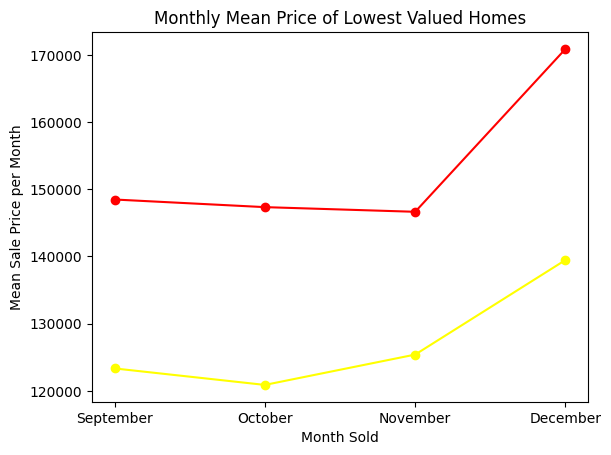

In [13]:
# chart the monthly mean prices for lowest home values

lou_low_monthly = np.array([lou_low_september_mean, lou_low_october_mean, lou_low_november_mean, lou_low_december_mean])
indy_low_monthly = np.array([indy_low_september_mean, indy_low_october_mean, indy_low_november_mean, indy_low_december_mean])
ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_low_monthly, marker="o", color="red")
plt.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price of Lowest Valued Homes")
plt.show()

In [14]:
# chart the monthly mean prices for the highest priced homes

lou_high_september_mean = lou_high_sorted["Property price (USD)"].iloc[0:260].mean()
lou_high_october_mean = lou_high_sorted["Property price (USD)"].iloc[260:552].mean()
lou_high_november_mean = lou_high_sorted["Property price (USD)"].iloc[552:798].mean()
lou_high_december_mean = lou_high_sorted["Property price (USD)"].iloc[798:810].mean()

indy_high_september_mean = indy_high_sorted["Property price (USD)"].iloc[0:153].mean()
indy_high_october_mean = indy_high_sorted["Property price (USD)"].iloc[153:329].mean()
indy_high_november_mean = indy_high_sorted["Property price (USD)"].iloc[329:799].mean()
indy_high_december_mean = indy_high_sorted["Property price (USD)"].iloc[799:814].mean()

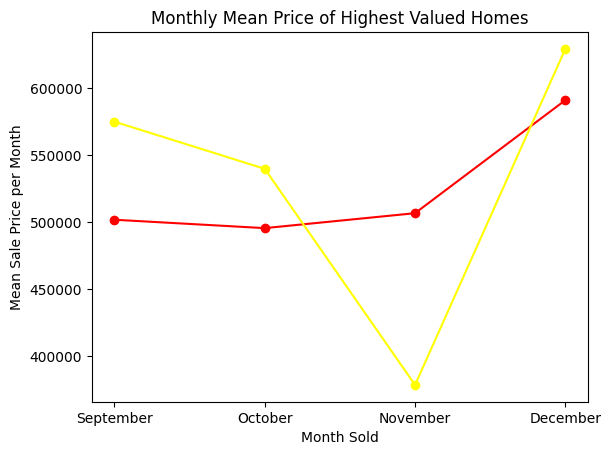

In [15]:
lou_high_monthly = np.array([lou_high_september_mean, lou_high_october_mean, lou_high_november_mean, lou_high_december_mean])
indy_high_monthly = np.array([indy_high_september_mean, indy_high_october_mean, indy_high_november_mean, indy_high_december_mean])
ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_high_monthly, marker="o", color="red")
plt.plot(indy_high_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price of Highest Valued Homes")
plt.show()

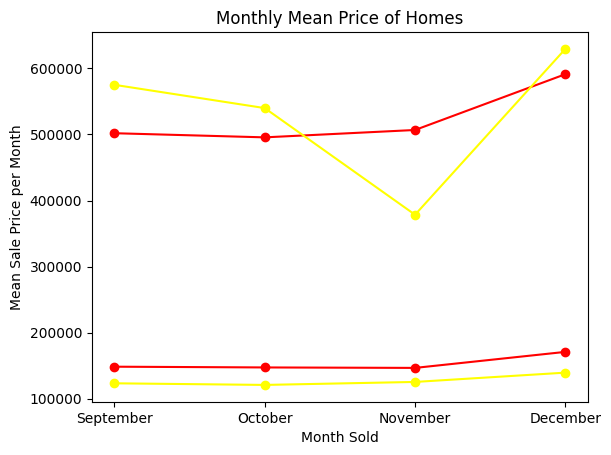

In [16]:
# chart monthly mean prices for all 4 datasets

ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_high_monthly, marker="o", color="red")
plt.plot(indy_high_monthly, marker="o", color="yellow")
plt.plot(lou_low_monthly, marker="o", color="red")
plt.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price of Homes")
plt.show()

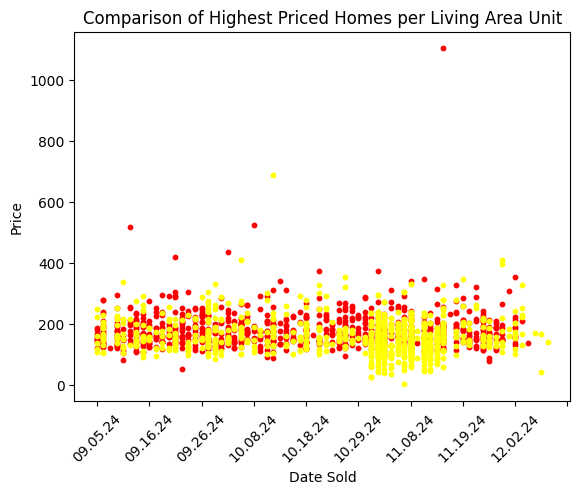

In [17]:
# look at price per living area unit rather than just raw price

x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Price per living area unit (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Price per living area unit (USD)"]

plt.scatter(x1, y1, color="red", s=10)
plt.scatter(x2, y2, color="yellow", s=10)
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.title("Comparison of Highest Priced Homes per Living Area Unit")
plt.show()

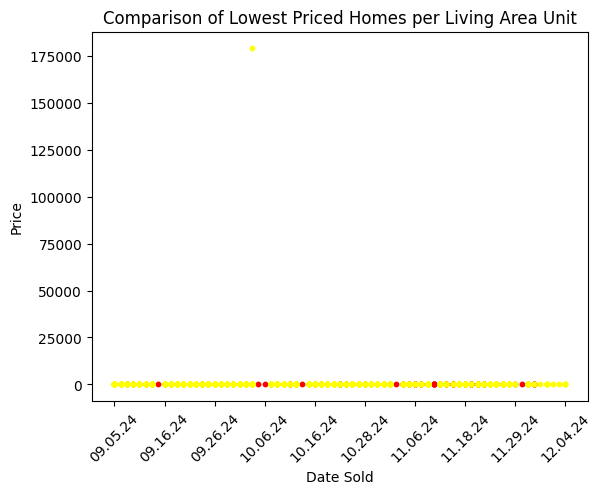

In [18]:
x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Price per living area unit (USD)"]
x2 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_low_sorted["Price per living area unit (USD)"]

plt.scatter(x1, y1, color="red", s=10)
plt.scatter(x2, y2, color="yellow", s=10)
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.title("Comparison of Lowest Priced Homes per Living Area Unit")
plt.show()

In [19]:
# Remove the outlier (clearly an error in the data)
threshold = 25000
indy_low_dropped = indy_low_sorted[indy_low_sorted["Price per living area unit (USD)"] < 25000]


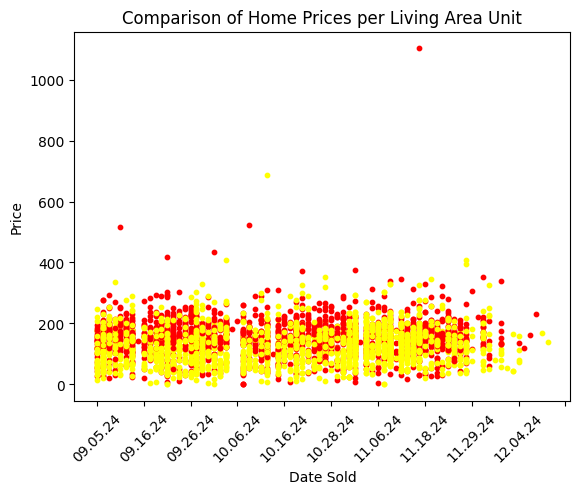

In [20]:
# scatter plot of all the datasets by price per living area unit

x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Price per living area unit (USD)"]
x2 = indy_low_dropped["Sold date (MM/DD/YYYY)"]
y2 = indy_low_dropped["Price per living area unit (USD)"]
x3 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y3 = lou_high_sorted["Price per living area unit (USD)"]
x4 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y4 = indy_high_sorted["Price per living area unit (USD)"]

plt.scatter(x1, y1, color="red", s=10)
plt.scatter(x2, y2, color="yellow", s=10)
plt.scatter(x3, y3, color="red", s=10)
plt.scatter(x4, y4, color="yellow", s=10)
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.title("Comparison of Home Prices per Living Area Unit")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.show()

In [21]:
# organize the per living area unit data by month

lou_low_september_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[0:267].mean()
lou_low_october_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[267:558].mean()
lou_low_november_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[558:794].mean()
lou_low_december_livingarea = lou_low_sorted["Price per living area unit (USD)"].iloc[794:803].mean()

indy_low_september_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[0:308].mean()
indy_low_october_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[308:626].mean()
indy_low_november_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[626:798].mean()
indy_low_december_livingarea = indy_low_dropped["Price per living area unit (USD)"].iloc[798:813].mean()

lou_high_september_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[0:260].mean()
lou_high_october_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[260:552].mean()
lou_high_november_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[552:798].mean()
lou_high_december_livingarea = lou_high_sorted["Price per living area unit (USD)"].iloc[798:810].mean()

indy_high_september_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[0:153].mean()
indy_high_october_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[153:329].mean()
indy_high_november_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[329:799].mean()
indy_high_december_livingarea = indy_high_sorted["Price per living area unit (USD)"].iloc[799:814].mean()

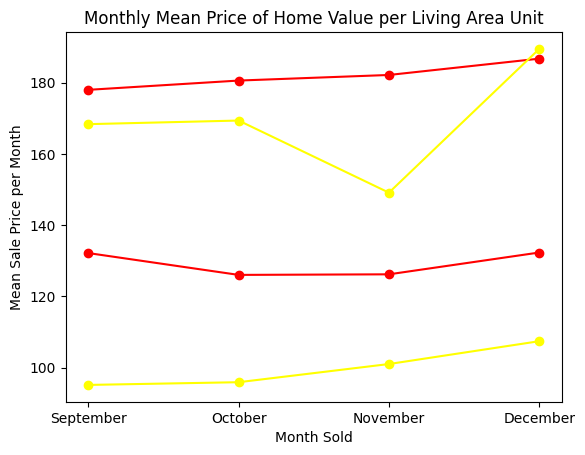

In [22]:
lou_low_monthly_perunit = np.array([lou_low_september_livingarea, lou_low_october_livingarea, lou_low_november_livingarea, lou_low_december_livingarea])
indy_low_monthly_perunit = np.array([indy_low_september_livingarea, indy_low_october_livingarea, indy_low_november_livingarea, indy_low_december_livingarea])
lou_high_monthly_perunit = np.array([lou_high_september_livingarea, lou_high_october_livingarea, lou_high_november_livingarea, lou_high_december_livingarea])
indy_high_monthly_perunit = np.array([indy_high_september_livingarea, indy_high_october_livingarea, indy_high_november_livingarea, indy_high_december_livingarea])
ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_low_monthly_perunit, marker="o", color="red")
plt.plot(indy_low_monthly_perunit, marker="o", color="yellow")
plt.plot(lou_high_monthly_perunit, marker="o", color="red")
plt.plot(indy_high_monthly_perunit, marker="o", color="yellow")

plt.title("Monthly Mean Price of Home Value per Living Area Unit")
plt.show()

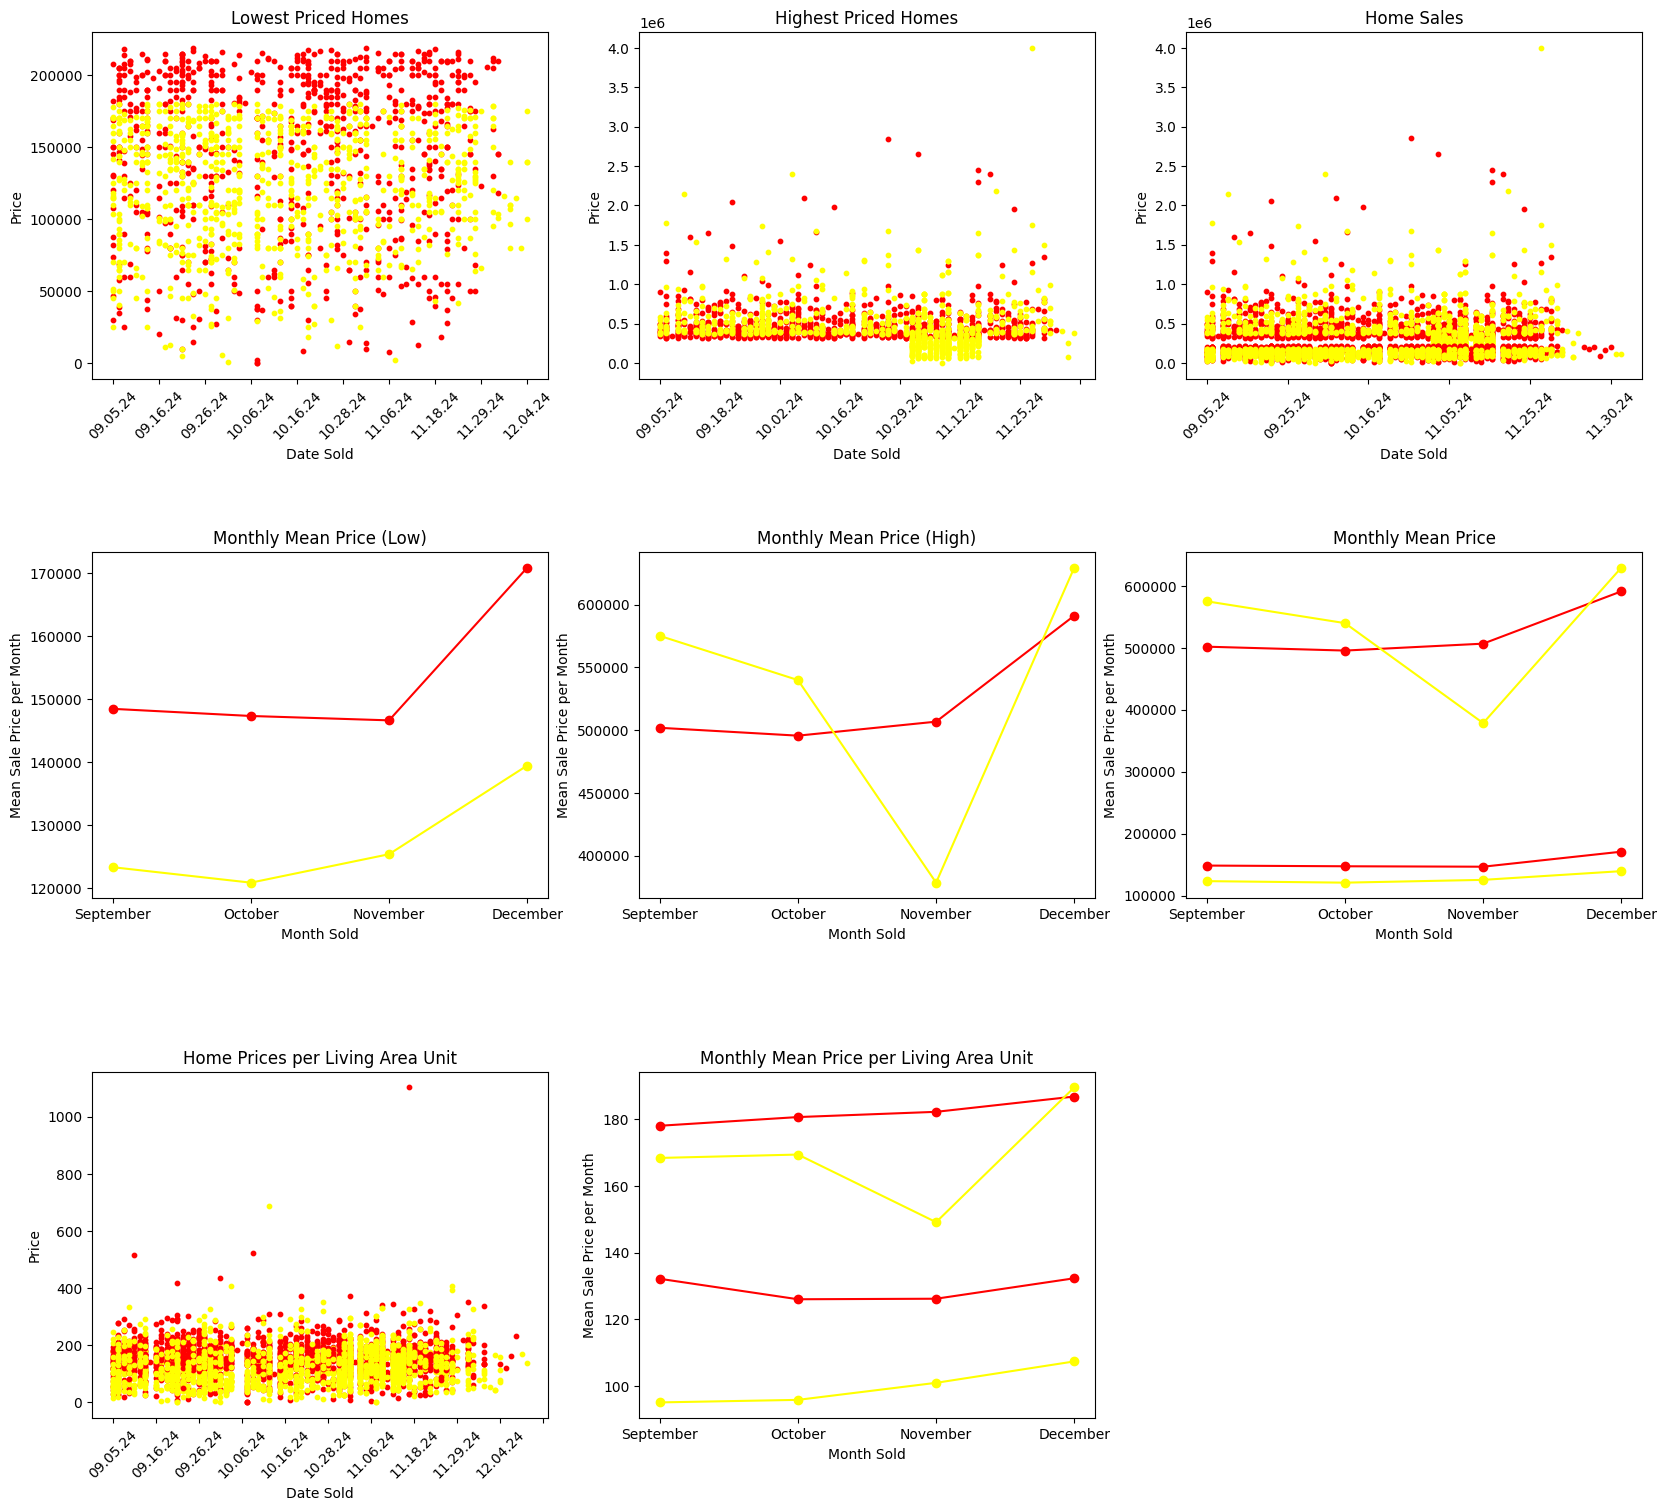

In [23]:
# Make a dashboard
fig = plt.figure(figsize=([20,18]))
grid = fig.add_gridspec(ncols=3,nrows=3)

# scatterplot 1
ax1 = fig.add_subplot(grid[0, 0])
x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Property price (USD)"]
x2 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_low_sorted["Property price (USD)"]

ax1.scatter(x1, y1, color="red", s=10)
ax1.scatter(x2, y2, color="yellow", s=10)
plt.xlabel("Date Sold", axes=ax1)
plt.ylabel("Price", axes=ax1)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10)) 
plt.xticks(rotation=45, axes=ax1)
plt.title("Lowest Priced Homes", axes=ax1)

#scatterplot 2
ax2 = fig.add_subplot(grid[0,1])
x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Property price (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Property price (USD)"]

ax2.scatter(x1, y1, color="red", s=10)
ax2.scatter(x2, y2, color="yellow", s=10)
plt.xlabel("Date Sold", axes=ax2)
plt.ylabel("Price", axes=ax2)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8)) 
plt.xticks(rotation=45, axes=ax2)
plt.title("Highest Priced Homes", axes=ax2)

#scatterplot 3
ax3 = fig.add_subplot(grid[0,2])
x1 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_high_sorted["Property price (USD)"]
x2 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y2 = indy_high_sorted["Property price (USD)"]
x3 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y3 = lou_low_sorted["Property price (USD)"]
x4 = indy_low_sorted["Sold date (MM/DD/YYYY)"]
y4 = indy_low_sorted["Property price (USD)"]

ax3.scatter(x1, y1, color="red", s=10)
ax3.scatter(x2, y2, color="yellow", s=10)
ax3.scatter(x3, y3, color="red", s=10)
ax3.scatter(x4, y4, color="yellow", s=10)
plt.xlabel("Date Sold", axes=ax3)
plt.ylabel("Price", axes=ax3)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(8)) 
plt.xticks(rotation=45, axes=ax3)
plt.title("Home Sales", axes=ax3)
 
#Line graph 1
ax4 = fig.add_subplot(grid[1,0])
lou_low_monthly = np.array([lou_low_september_mean, lou_low_october_mean, lou_low_november_mean, lou_low_december_mean])
indy_low_monthly = np.array([indy_low_september_mean, indy_low_october_mean, indy_low_november_mean, indy_low_december_mean])

ax4.set_xticks([0,1,2,3])
ax4.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax4)
plt.ylabel("Mean Sale Price per Month", axes=ax4)
ax4.plot(lou_low_monthly, marker="o", color="red")
ax4.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price (Low)", axes=ax4)

#line graph 2
ax5 = fig.add_subplot(grid[1,1])
lou_high_monthly = np.array([lou_high_september_mean, lou_high_october_mean, lou_high_november_mean, lou_high_december_mean])
indy_high_monthly = np.array([indy_high_september_mean, indy_high_october_mean, indy_high_november_mean, indy_high_december_mean])

ax5.set_xticks([0,1,2,3])
ax5.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax5)
plt.ylabel("Mean Sale Price per Month", axes=ax5)
ax5.plot(lou_high_monthly, marker="o", color="red")
ax5.plot(indy_high_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price (High)", axes=ax5)

 
#line graph combined
ax6 = fig.add_subplot(grid[1,2])
ax6.set_xticks([0,1,2,3])
ax6.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax6)
plt.ylabel("Mean Sale Price per Month", axes=ax6)
ax6.plot(lou_high_monthly, marker="o", color="red")
ax6.plot(indy_high_monthly, marker="o", color="yellow")
ax6.plot(lou_low_monthly, marker="o", color="red")
ax6.plot(indy_low_monthly, marker="o", color="yellow")
plt.title("Monthly Mean Price", axes=ax6)


#scatter price per living area
ax7 = fig.add_subplot(grid[2,0])
x1 = lou_low_sorted["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted["Price per living area unit (USD)"]
x2 = indy_low_dropped["Sold date (MM/DD/YYYY)"]
y2 = indy_low_dropped["Price per living area unit (USD)"]
x3 = lou_high_sorted["Sold date (MM/DD/YYYY)"]
y3 = lou_high_sorted["Price per living area unit (USD)"]
x4 = indy_high_sorted["Sold date (MM/DD/YYYY)"]
y4 = indy_high_sorted["Price per living area unit (USD)"]

ax7.scatter(x1, y1, color="red", s=10)
ax7.scatter(x2, y2, color="yellow", s=10)
ax7.scatter(x3, y3, color="red", s=10)
ax7.scatter(x4, y4, color="yellow", s=10)
plt.xlabel("Date Sold", axes=ax7)
plt.ylabel("Price", axes=ax7)
plt.title("Home Prices per Living Area Unit", axes=ax7)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45, axes=ax7)
 
#living area line graph
ax8 = fig.add_subplot(grid[2,1])
lou_low_monthly_perunit = np.array([lou_low_september_livingarea, lou_low_october_livingarea, lou_low_november_livingarea, lou_low_december_livingarea])
indy_low_monthly_perunit = np.array([indy_low_september_livingarea, indy_low_october_livingarea, indy_low_november_livingarea, indy_low_december_livingarea])
lou_high_monthly_perunit = np.array([lou_high_september_livingarea, lou_high_october_livingarea, lou_high_november_livingarea, lou_high_december_livingarea])
indy_high_monthly_perunit = np.array([indy_high_september_livingarea, indy_high_october_livingarea, indy_high_november_livingarea, indy_high_december_livingarea])

ax8.set_xticks([0,1,2,3])
ax8.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold", axes=ax8)
plt.ylabel("Mean Sale Price per Month", axes=ax8)
ax8.plot(lou_low_monthly_perunit, marker="o", color="red")
ax8.plot(indy_low_monthly_perunit, marker="o", color="yellow")
ax8.plot(lou_high_monthly_perunit, marker="o", color="red")
ax8.plot(indy_high_monthly_perunit, marker="o", color="yellow")
plt.title("Monthly Mean Price per Living Area Unit", axes=ax8)

 

plt.subplots_adjust(hspace=0.5) 
plt.show()

Analysis:
My initial question was: Which housing market has shown the most increase in price, Louisville or Indianapolis?
After looking at home sale prices and the prices per living area unit (sqft), I recognize that my question cannot be answered directly. Generally, Louisville homes have a wider range of prices, but this is not an increase in price. As seen on the first scatter plots of home sales, Louisville has more homes that have sold at higher prices and lower prices than Indianapolis. However, converting these raw sales into mean sale price for each month (the line graphs), shows no major increase (or decrease) in the Louisville values. So, the wider range of Louisville prices does not indicate that the property prices are increasing (at least not significantly).
Instead of one market being hotter than the other, it apears that one is more volatile than the other. Looking at the line charts of the monthly mean sale prices, the lowest priced homes increase in value for Indianapolis (I included December but we are only a few days in so the increase there is not very significant), but then the highest priced homes have a significant drop in sale prices in November. Louisville has small changes (decrease in the lower home prices and increase in the higher home prices), but nothing as significant as the jumps being made in Indianopolis.
A more significant marker, in my opinion, is the price per interior unit. Since Zillow will only display a selection of all the sales for the previous months (there are a few thousand), I could only see the 820 lowest and highest priced homes. Though the home prices hover between 120k-150k and 400k-600k respectively (again not counting the 4 days of December when I ran this), the change in price per interior unit confirms that there is change, especially with Indianapolis. For example, the lower value Indianapolis homes decrease in price from September to October and then increase. The price per interior unit increases each month but significantly in November. So, not only are these homes being sold for more money from October to November, people are buying less house for more money (i.e., it isn't just that bigger houses suddenly came on the market). The higher priced homes in Indianapolis are also interesting because the prices go down while the price per interior unit goes up in October but then both drop significantly in November. 
Meanwhile, in Louisville, lower priced homes decrease steadily in price and price per interior unit from September to November and steadily increased for both in the higher priced homes.

Main Conclusions:
Depending on whether we look at the higher priced or lower priced homes, Indianapolis or Louisville could be argued as the hotter market (Louisville increases from September to November in the higher priced homes while Indianapolis increases in the lower priced houses). This makes the answer to the initial question inconclusive. However, it is much easier to answer which one is the most volatile: Indianapolis. Both sets of data (lower and higher priced homes) show a steady change month to month in Louisville, but Indianapolis has much larger changes month to month.

Further Research:
In an ideal world, future research could be done on all the home sales per month for each city. However, most online listing sites limit the number of entries that they will display (even on their sale maps). Another method could be looking further back than 90 days but, here again, the increase in sold properties hits the maximum display limit. I would also like to see the difference between the listing prices and the sold prices, but that would take time to document since the listing prices aren’t always available after the property is sold. There are so many ways that this data could be reanalyzed, whether the data as I have it now or with a few additions (like list prices).

In [24]:
# Make it better, make it more.

I have looked at highest and lowest home sales in Louisville and Indianapolis (raw and mean per month). I have looked at the home price per interior unit (raw and mean per month). What about the price per exterior/lot size? I can compare that with the previous analyses.

In [25]:
lou_low_sorted_no_null = lou_low_sorted.copy()
lou_high_sorted_no_null = lou_high_sorted.copy()
indy_low_sorted_no_null = indy_low_sorted.copy()
indy_high_sorted_no_null = indy_high_sorted.copy()

In [26]:
# Remove null values for land/lot columns

lou_low_sorted_no_null = lou_low_sorted_no_null.dropna(subset=["Lot/land area","Lot/land area unit"])
lou_high_sorted_no_null = lou_high_sorted_no_null.dropna(subset=["Lot/land area","Lot/land area unit"])
indy_low_sorted_no_null = indy_low_sorted_no_null.dropna(subset=["Lot/land area","Lot/land area unit"])
indy_high_sorted_no_null = indy_high_sorted_no_null.dropna(subset=["Lot/land area","Lot/land area unit"])


In [27]:
lou_low_sorted_no_null["Lot/land area"] = (lou_low_sorted_no_null["Lot/land area"].mask(lou_low_sorted_no_null["Lot/land area unit"].eq("acres"),
                                                                                        lou_low_sorted_no_null["Lot/land area"].astype(float) * 43560))
lou_high_sorted_no_null["Lot/land area"] = (lou_high_sorted_no_null["Lot/land area"].mask(lou_high_sorted_no_null["Lot/land area unit"].eq("acres"),
                                                                                        lou_high_sorted_no_null["Lot/land area"].astype(float) * 43560))
indy_low_sorted_no_null["Lot/land area"] = (indy_low_sorted_no_null["Lot/land area"].mask(indy_low_sorted_no_null["Lot/land area unit"].eq("acres"),
                                                                                        indy_low_sorted_no_null["Lot/land area"].astype(float) * 43560))
indy_high_sorted_no_null["Lot/land area"] = (indy_high_sorted_no_null["Lot/land area"].mask(indy_high_sorted_no_null["Lot/land area unit"].eq("acres"),
                                                                                        indy_high_sorted_no_null["Lot/land area"].astype(float) * 43560))


In [28]:
lou_low_sorted_no_null["Lot/land area unit"] = lou_low_sorted_no_null["Lot/land area unit"].str.replace("acres","sqft")
lou_high_sorted_no_null["Lot/land area unit"] = lou_high_sorted_no_null["Lot/land area unit"].str.replace("acres","sqft")
indy_low_sorted_no_null["Lot/land area unit"] = indy_low_sorted_no_null["Lot/land area unit"].str.replace("acres","sqft")
indy_high_sorted_no_null["Lot/land area unit"] = indy_high_sorted_no_null["Lot/land area unit"].str.replace("acres","sqft")

Put in the percentage of home value 
From August 2024: 17.1% in Louisville, 19.8% in Indianapolis. Source: Land share of total property value by metro, https://blackrealestateagents.com/what-is-your-home-worth-land-value-building-value/
From October 2020: 22.3% in Louisville, 18.0% in Indianapolis. Source: https://www.redfin.com/news/value-of-house-vs-land/

I will ues the numbers from August 2024. The exact % should matter significantly as I am measuring the change in price per square foot of lot/land within each city rather than the price per square foot between the cities.

So if I get 25% of home value then divide by sqft, that would give me price per lot area in USD.


In [29]:
# make a new column called land_price_per_square_foot
lou_low_sorted_no_null["land_price_per_square_foot"] = (lou_low_sorted_no_null["Property price (USD)"] * .171) / lou_low_sorted_no_null["Lot/land area"]
lou_high_sorted_no_null["land_price_per_square_foot"] = (lou_high_sorted_no_null["Property price (USD)"] * .171) / lou_high_sorted_no_null["Lot/land area"]

indy_low_sorted_no_null["land_price_per_square_foot"] = (indy_low_sorted_no_null["Property price (USD)"] * .198) / indy_low_sorted_no_null["Lot/land area"]
indy_high_sorted_no_null["land_price_per_square_foot"] = (indy_high_sorted_no_null["Property price (USD)"] * .198) / indy_high_sorted_no_null["Lot/land area"]



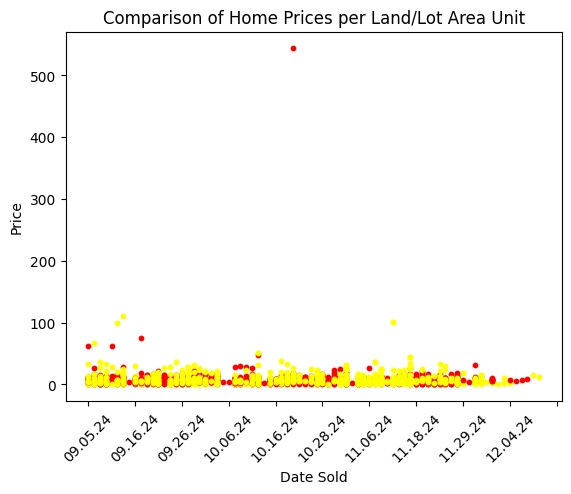

In [30]:
# scatter plot of all the datasets by price per land/lot area unit

x1 = lou_low_sorted_no_null["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted_no_null["land_price_per_square_foot"]
x2 = indy_low_sorted_no_null["Sold date (MM/DD/YYYY)"]
y2 = indy_low_sorted_no_null["land_price_per_square_foot"]
x3 = lou_high_sorted_no_null["Sold date (MM/DD/YYYY)"]
y3 = lou_high_sorted_no_null["land_price_per_square_foot"]
x4 = indy_high_sorted_no_null["Sold date (MM/DD/YYYY)"]
y4 = indy_high_sorted_no_null["land_price_per_square_foot"]

plt.scatter(x1, y1, color="red", s=10)
plt.scatter(x2, y2, color="yellow", s=10)
plt.scatter(x3, y3, color="red", s=10)
plt.scatter(x4, y4, color="yellow", s=10)
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.title("Comparison of Home Prices per Land/Lot Area Unit")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.show()

In [31]:
# Remove the outlier (clearly an error in the data)
threshold = 400
lou_high_dropped = lou_high_sorted_no_null[lou_high_sorted_no_null["land_price_per_square_foot"] < 400]
# lou_low_sorted_no_null["land_price_per_square_foot"] = lou_low_sorted_no_null["land_price_per_square_foot"].clip(upper=200)

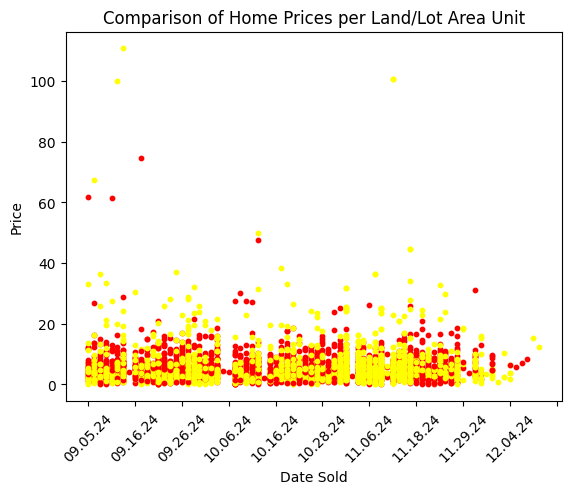

In [32]:
# scatter plot of all the datasets by price per land/lot area unit

x1 = lou_low_sorted_no_null["Sold date (MM/DD/YYYY)"]
y1 = lou_low_sorted_no_null["land_price_per_square_foot"]
x2 = indy_low_sorted_no_null["Sold date (MM/DD/YYYY)"]
y2 = indy_low_sorted_no_null["land_price_per_square_foot"]
x3 = lou_high_dropped["Sold date (MM/DD/YYYY)"]
y3 = lou_high_dropped["land_price_per_square_foot"]
x4 = indy_high_sorted_no_null["Sold date (MM/DD/YYYY)"]
y4 = indy_high_sorted_no_null["land_price_per_square_foot"]

plt.scatter(x1, y1, color="red", s=10)
plt.scatter(x2, y2, color="yellow", s=10)
plt.scatter(x3, y3, color="red", s=10)
plt.scatter(x4, y4, color="yellow", s=10)
plt.xlabel("Date Sold")
plt.ylabel("Price")
plt.title("Comparison of Home Prices per Land/Lot Area Unit")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12)) 
plt.xticks(rotation=45)
plt.show()

In [33]:
# drop rows with no lot/land area
lou_high_dropped2 = lou_high_dropped[lou_high_dropped["Lot/land area"] != 0.0]

In [34]:
# sort it by month
lou_low_september_lot = lou_low_sorted_no_null["land_price_per_square_foot"].iloc[0:258].mean()
lou_low_october_lot = lou_low_sorted_no_null["land_price_per_square_foot"].iloc[258:540].mean()
lou_low_november_lot = lou_low_sorted_no_null["land_price_per_square_foot"].iloc[540:775].mean()
lou_low_december_lot = lou_low_sorted_no_null["land_price_per_square_foot"].iloc[775:783].mean()

lou_high_september_lot = lou_high_dropped2["land_price_per_square_foot"].iloc[0:260].mean()
lou_high_october_lot = lou_high_dropped2["land_price_per_square_foot"].iloc[260:550].mean()
lou_high_november_lot = lou_high_dropped2["land_price_per_square_foot"].iloc[550:790].mean()
lou_high_december_lot = lou_high_dropped2["land_price_per_square_foot"].iloc[790:802].mean()

indy_low_september_lot = indy_low_sorted_no_null["land_price_per_square_foot"].iloc[0:153].mean()
indy_low_october_lot = indy_low_sorted_no_null["land_price_per_square_foot"].iloc[:613].mean()
indy_low_november_lot = indy_low_sorted_no_null["land_price_per_square_foot"].iloc[613:785].mean()
indy_low_december_lot = indy_low_sorted_no_null["land_price_per_square_foot"].iloc[785:800].mean()

indy_high_september_lot = indy_high_sorted_no_null["land_price_per_square_foot"].iloc[0:258].mean()
indy_high_october_lot = indy_high_sorted_no_null["land_price_per_square_foot"].iloc[258:329].mean()
indy_high_november_lot = indy_high_sorted_no_null["land_price_per_square_foot"].iloc[329:799].mean()
indy_high_december_lot = indy_high_sorted_no_null["land_price_per_square_foot"].iloc[799:814].mean()



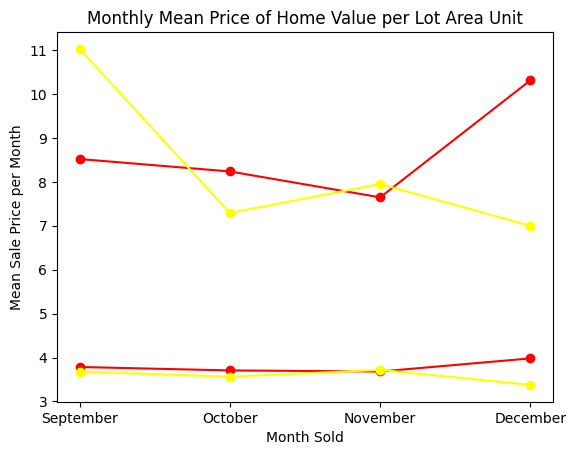

In [35]:
lou_low_monthly_perlot = np.array([lou_low_september_lot, lou_low_october_lot, lou_low_november_lot, lou_low_december_lot])
indy_low_monthly_perlot = np.array([indy_low_september_lot, indy_low_october_lot, indy_low_november_lot, indy_low_december_lot])
lou_high_monthly_perlot = np.array([lou_high_september_lot, lou_high_october_lot, lou_high_november_lot, lou_high_december_lot])
indy_high_monthly_perlot = np.array([indy_high_september_lot, indy_high_october_lot, indy_high_november_lot, indy_high_december_lot])
ax = plt.axes()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["September","October","November","December"])
plt.xlabel("Month Sold")
plt.ylabel("Mean Sale Price per Month")
plt.plot(lou_low_monthly_perlot, marker="o", color="red")
plt.plot(indy_low_monthly_perlot, marker="o", color="yellow")
plt.plot(lou_high_monthly_perlot, marker="o", color="red")
plt.plot(indy_high_monthly_perlot, marker="o", color="yellow")

plt.title("Monthly Mean Price of Home Value per Lot Area Unit")
plt.show()

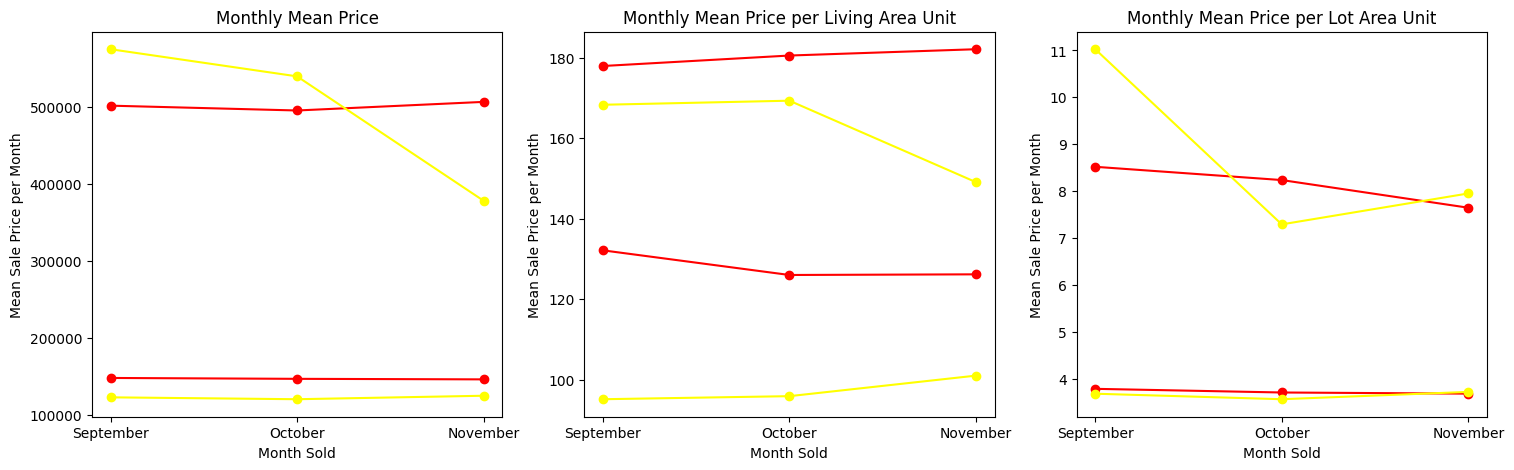

In [36]:
# Put it all together and take out December since it only has 4 days
fig = plt.figure(figsize=([18,5]))
grid = fig.add_gridspec(ncols=3,nrows=1)
 
#Line graph price
lou_low_monthly_nodec = np.array([lou_low_september_mean, lou_low_october_mean, lou_low_november_mean])
indy_low_monthly_nodec = np.array([indy_low_september_mean, indy_low_october_mean, indy_low_november_mean])
lou_high_monthly_nodec = np.array([lou_high_september_mean, lou_high_october_mean, lou_high_november_mean])
indy_high_monthly_nodec = np.array([indy_high_september_mean, indy_high_october_mean, indy_high_november_mean])

ax1 = fig.add_subplot(grid[0,0])
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(["September","October","November"])
plt.xlabel("Month Sold", axes=ax6)
plt.ylabel("Mean Sale Price per Month", axes=ax1)
ax1.plot(lou_high_monthly_nodec, marker="o", color="red")
ax1.plot(indy_high_monthly_nodec, marker="o", color="yellow")
ax1.plot(lou_low_monthly_nodec, marker="o", color="red")
ax1.plot(indy_low_monthly_nodec, marker="o", color="yellow")
plt.title("Monthly Mean Price", axes=ax1)

 
#living area line graph
ax2 = fig.add_subplot(grid[0,1])
lou_low_monthly_perunit_nodec = np.array([lou_low_september_livingarea, lou_low_october_livingarea, lou_low_november_livingarea])
indy_low_monthly_perunit_nodec = np.array([indy_low_september_livingarea, indy_low_october_livingarea, indy_low_november_livingarea])
lou_high_monthly_perunit_nodec = np.array([lou_high_september_livingarea, lou_high_october_livingarea, lou_high_november_livingarea])
indy_high_monthly_perunit_nodec = np.array([indy_high_september_livingarea, indy_high_october_livingarea, indy_high_november_livingarea])

ax2.set_xticks([0,1,2])
ax2.set_xticklabels(["September","October","November"])
plt.xlabel("Month Sold", axes=ax2)
plt.ylabel("Mean Sale Price per Month", axes=ax2)
ax2.plot(lou_low_monthly_perunit_nodec, marker="o", color="red")
ax2.plot(indy_low_monthly_perunit_nodec, marker="o", color="yellow")
ax2.plot(lou_high_monthly_perunit_nodec, marker="o", color="red")
ax2.plot(indy_high_monthly_perunit_nodec, marker="o", color="yellow")
plt.title("Monthly Mean Price per Living Area Unit", axes=ax2)

#land area line graph
lou_low_monthly_perlot_nodec = np.array([lou_low_september_lot, lou_low_october_lot, lou_low_november_lot])
indy_low_monthly_perlot_nodec = np.array([indy_low_september_lot, indy_low_october_lot, indy_low_november_lot])
lou_high_monthly_perlot_nodec = np.array([lou_high_september_lot, lou_high_october_lot, lou_high_november_lot])
indy_high_monthly_perlot_nodec = np.array([indy_high_september_lot, indy_high_october_lot, indy_high_november_lot])

ax3 = fig.add_subplot(grid[0,2])
ax3.set_xticks([0,1,2])
ax3.set_xticklabels(["September","October","November"])
plt.xlabel("Month Sold", axes=ax3)
plt.ylabel("Mean Sale Price per Month", axes=ax3)
ax3.plot(lou_low_monthly_perlot_nodec, marker="o", color="red")
ax3.plot(indy_low_monthly_perlot_nodec, marker="o", color="yellow")
ax3.plot(lou_high_monthly_perlot_nodec, marker="o", color="red")
ax3.plot(indy_high_monthly_perlot_nodec, marker="o", color="yellow")

plt.title("Monthly Mean Price per Lot Area Unit", axes=ax3)

 

# plt.subplots_adjust(hspace=0.5) 
plt.show()
